In [91]:
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, MultiPoint
import pandas as pd
import matplotlib.pyplot as plt
import mplleaflet
import matplotlib.cm as cm
import matplotlib.colors as co
import numpy as np

#1 North America 2 Central America 3 South America
#4 East Asia 5 Southeast Asia 6 South Asia 7 Central Asia 12 Oceania
#8 Western Europe 9 Eastern Europe
#10 Middle East 11 Sub-saharian Africa

dataframe = pd.read_csv('Features pre-processed.csv', 
                            usecols=["eventid", "country", "region", "longitude", "latitude", "iyear", "nkill", "gname",
                                     "success", "suicide", "attacktype1_txt", "targtype1_txt", "natlty1", "weaptype1", "related"]);
dataframe.columns;

<Figure size 432x288 with 0 Axes>

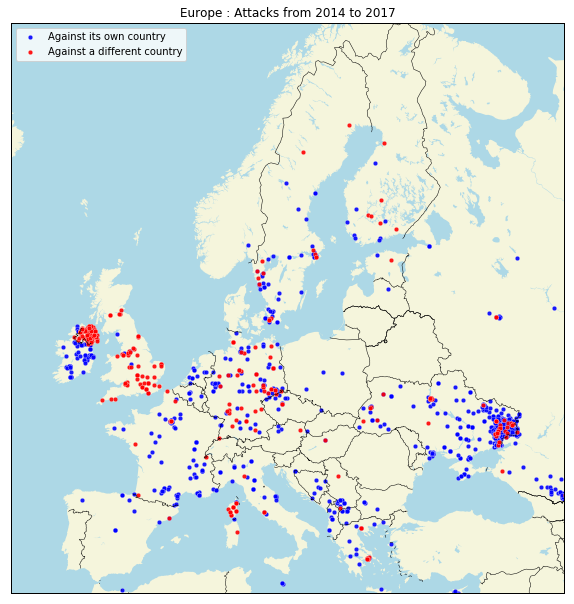

In [92]:
europe = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-15, 
        llcrnrlat=35,
        urcrnrlon=45,
        urcrnrlat=70,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

europe_dataframe = dataframe.loc[dataframe['region'] >= 8 ] #europe
europe_dataframe = europe_dataframe.loc[europe_dataframe['region'] <= 9 ]
europe_dataframe0 = europe_dataframe.loc[europe_dataframe['country'] == europe_dataframe['natlty1'] ]
europe_dataframe1 = europe_dataframe.loc[europe_dataframe['country'] != europe_dataframe['natlty1'] ]

europe_points0 = pd.Series(
                [Point(europe(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(europe_dataframe0['longitude'], 
                                               europe_dataframe0['latitude'])])
europe_points1 = pd.Series(
                [Point(europe(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(europe_dataframe1['longitude'], 
                                               europe_dataframe1['latitude'])])

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.set_size_inches(18.5, 10.5)

dev = europe.scatter(
            [geom.x for geom in europe_points0],
            [geom.y for geom in europe_points0],
            20, marker='o', lw=.25,
            facecolor='blue', edgecolor='w', label='Against its own country',
            alpha=0.9,antialiased=True,
            zorder=2)
dev = europe.scatter(
            [geom.x for geom in europe_points1],
            [geom.y for geom in europe_points1],
            20, marker='o', lw=.25,
            facecolor='red', edgecolor='w', label='Against a different country',
            alpha=0.9,antialiased=True,
            zorder=2)

europe.fillcontinents(color='beige',lake_color='lightblue');
europe.drawcountries();
europe.drawmapboundary(fill_color='lightblue');
plt.title('Europe : Attacks from 2014 to 2017')
plt.legend()
plt.savefig("europe_nationality.png")

<Figure size 432x288 with 0 Axes>

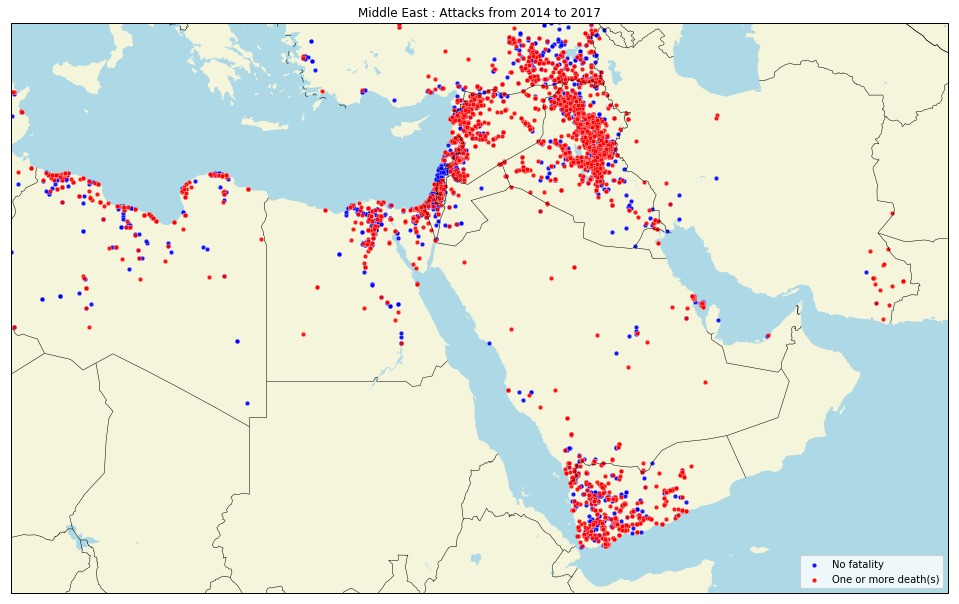

In [97]:
middle = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=10, 
        llcrnrlat=10,
        urcrnrlon=65,
        urcrnrlat=40,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

middle_dataframe = dataframe.loc[dataframe['region'] == 10 ] #europe and middle east
middle_dataframe0 = middle_dataframe.loc[middle_dataframe['nkill'] == 0 ]
middle_dataframe1 = middle_dataframe.loc[middle_dataframe['nkill'] > 0 ]

middle_points0 = pd.Series(
                [Point(middle(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(middle_dataframe0['longitude'], 
                                               middle_dataframe0['latitude'])])
middle_points1 = pd.Series(
                [Point(middle(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(middle_dataframe1['longitude'], 
                                               middle_dataframe1['latitude'])])

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.set_size_inches(18.5, 10.5)

dev = middle.scatter(
            [geom.x for geom in middle_points0],
            [geom.y for geom in middle_points0],
            20, marker='o', lw=.25,
            facecolor='blue', edgecolor='w', label='No fatality',
            alpha=0.9,antialiased=True,
            zorder=2)
dev = middle.scatter(
            [geom.x for geom in middle_points1],
            [geom.y for geom in middle_points1],
            20, marker='o', lw=.25,
            facecolor='red', edgecolor='w', label='One or more death(s)',
            alpha=0.9,antialiased=True,
            zorder=2)

middle.fillcontinents(color='beige',lake_color='lightblue');
middle.drawcountries();
middle.drawmapboundary(fill_color='lightblue');
plt.title('Middle East : Attacks from 2014 to 2017')
plt.legend()
plt.savefig("middle_deaths.png")

<Figure size 432x288 with 0 Axes>

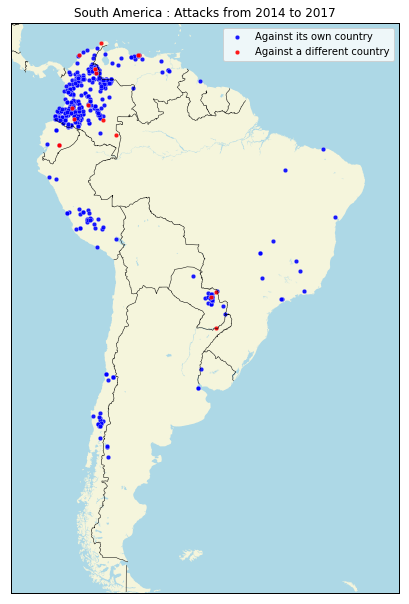

In [94]:
sa = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-85, 
        llcrnrlat=-55,
        urcrnrlon=-30,
        urcrnrlat=15,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

sa_dataframe = dataframe.loc[dataframe['region'] == 3 ] #south america
sa_dataframe0 = sa_dataframe.loc[sa_dataframe['country'] == sa_dataframe['natlty1'] ]
sa_dataframe1 = sa_dataframe.loc[sa_dataframe['country'] != sa_dataframe['natlty1'] ]

sa_points0 = pd.Series(
                [Point(sa(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(sa_dataframe0['longitude'], 
                                               sa_dataframe0['latitude'])])
sa_points1 = pd.Series(
                [Point(sa(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(sa_dataframe1['longitude'], 
                                               sa_dataframe1['latitude'])])

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.set_size_inches(18.5, 10.5)

dev = sa.scatter(
            [geom.x for geom in sa_points0],
            [geom.y for geom in sa_points0],
            20, marker='o', lw=.25,
            facecolor='blue', edgecolor='w', label='Against its own country',
            alpha=0.9,antialiased=True,
            zorder=2)
dev = sa.scatter(
            [geom.x for geom in sa_points1],
            [geom.y for geom in sa_points1],
            20, marker='o', lw=.25,
            facecolor='red', edgecolor='w', label='Against a different country',
            alpha=0.9,antialiased=True,
            zorder=2)

sa.fillcontinents(color='beige',lake_color='lightblue');
sa.drawcountries();
sa.drawmapboundary(fill_color='lightblue');
plt.title('South America : Attacks from 2014 to 2017')
plt.legend()
plt.savefig("southamerica_nationality.png")